In [2]:
# 전체 컬럼(Car_Name, Year 포함)을 사용하는 중고차 EDA 전체 코드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 1. 데이터 불러오기
df = pd.read_csv("data/car_data.csv")

# 2. 기본 정보 확인
print("기본 정보:")
print(df.info())
print("\n상위 5개 행:")
print(df.head())

기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

상위 5개 행:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85        

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
# 수치형 및 범주형 변수 분류
numerical = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical = df.select_dtypes(include=["object"]).columns.tolist()

print(numerical)
print(categorical)

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']


In [9]:
# 3. 파생 변수: 자동차 나이
df["Car_Age"] = 2025 - df["Year"]

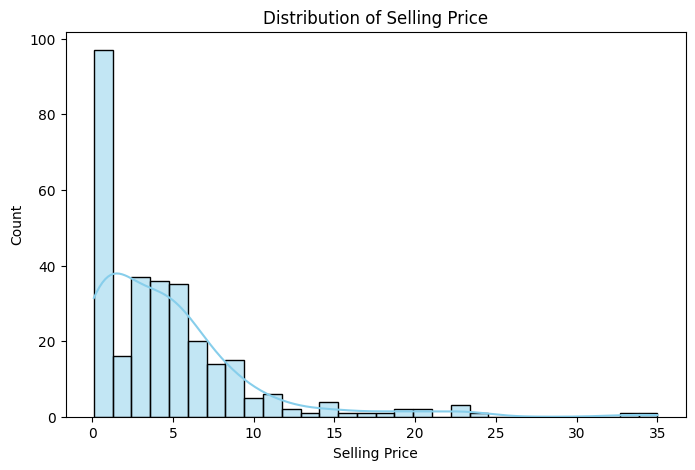

In [10]:
# 4-1. 수치형 변수: 판매 가격 분포
plt.figure(figsize=(8, 5))
sns.histplot(df["Selling_Price"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()

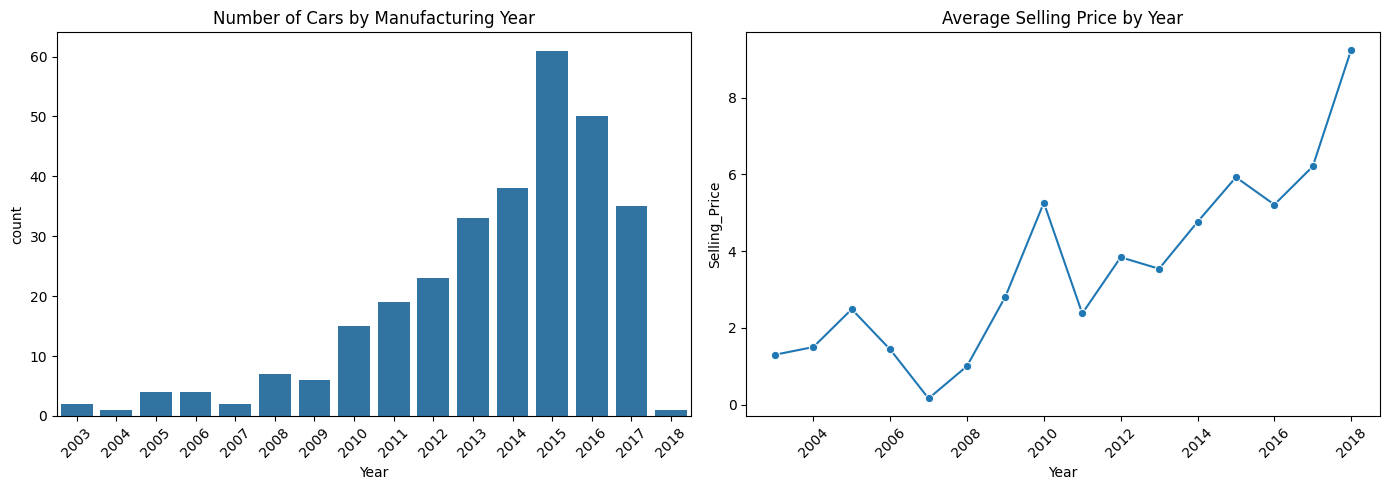

In [11]:
# 4-6. Year별 등록 차량 수 & 평균 가격
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="Year", data=df, order=sorted(df["Year"].unique()))
plt.xticks(rotation=45)
plt.title("Number of Cars by Manufacturing Year")

plt.subplot(1, 2, 2)
year_price = df.groupby("Year")["Selling_Price"].mean().reset_index()
sns.lineplot(data=year_price, x="Year", y="Selling_Price", marker="o")
plt.xticks(rotation=45)
plt.title("Average Selling Price by Year")

plt.tight_layout()
plt.show()

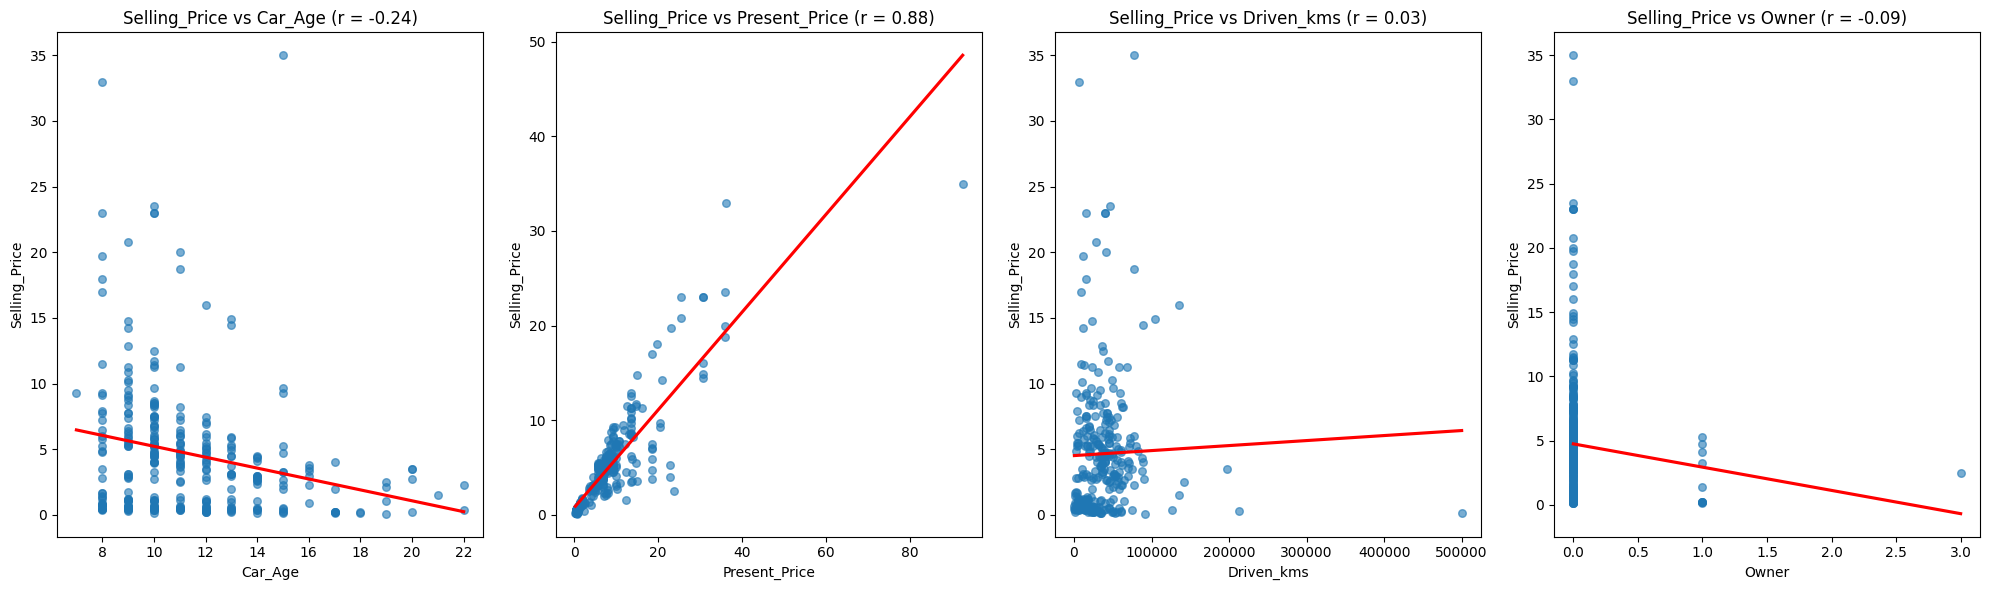

In [12]:
# 4-1. 수치형 변수: 차량 나이, 출시가, 주행거리, 소유주 수와 현재 가격과의 관계
from scipy.stats import pearsonr

fig, axs = plt.subplots(1, 4, figsize=(20, 6))
variables = ['Car_Age', 'Present_Price', 'Driven_kms', 'Owner']

for i, var in enumerate(variables):
    ax = axs[i]
    sns.regplot(x=var, y='Selling_Price', data=df, ax=ax, ci=None, scatter_kws={'s':30, 'alpha':0.6}, line_kws={'color':'red'})

    # 피어슨 상관계수 계산
    r, _ = pearsonr(df[var], df['Selling_Price'])

    ax.set_title(f'Selling_Price vs {var} (r = {r:.2f})')
    ax.set_xlabel(var)
    ax.set_ylabel('Selling_Price')

plt.tight_layout()
plt.show()

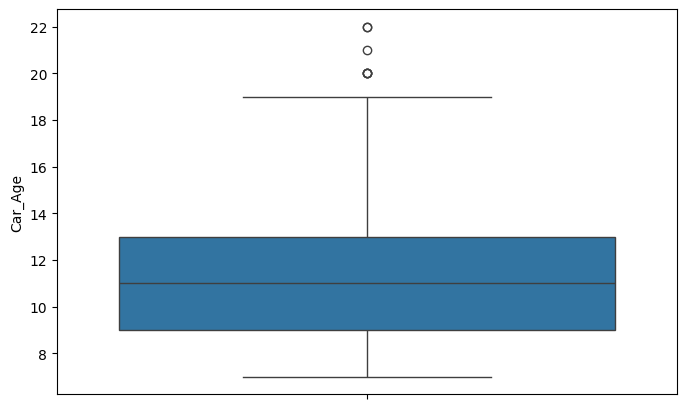

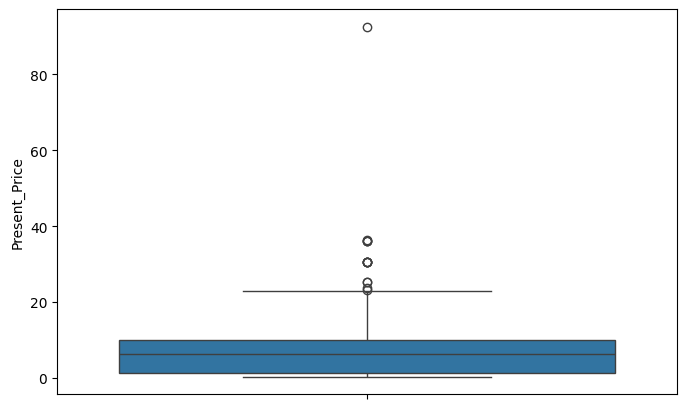

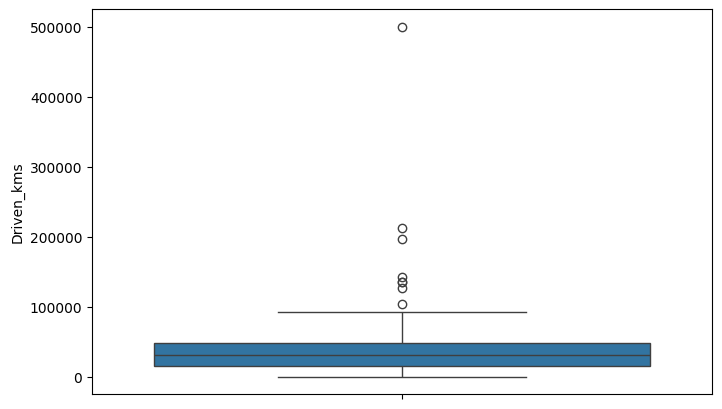

In [13]:
variables = ['Car_Age', 'Present_Price', 'Driven_kms']

# boxplot을 사용하여 각 변수의 이상치 시각화
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[var])
    plt.show()




In [14]:
# 이상치 제거
# Present_Price에서 가장 이상치(최대값) 하나 제거
idx_max_price = df['Present_Price'].idxmax()
df = df.drop(idx_max_price)

# Driven_kms에서 가장 이상치(최대값) 하나 제거
idx_max_kms = df['Driven_kms'].idxmax()
df = df.drop(idx_max_kms)


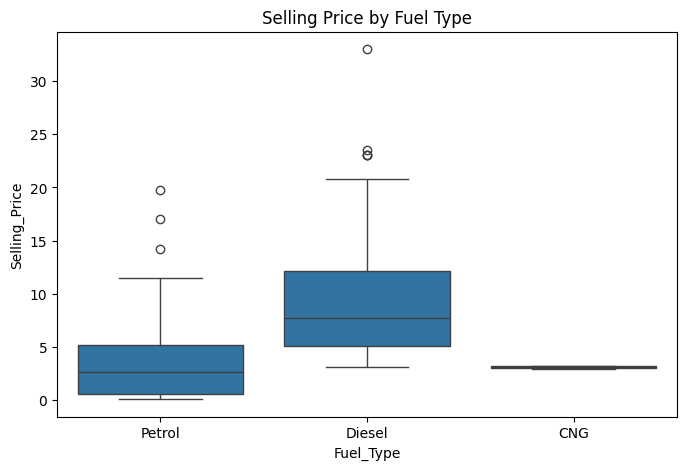

In [15]:
# 5-1. 범주형 변수: 연료 유형별 평균 현재 판매가
plt.figure(figsize=(8, 5))
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=df)
plt.title("Selling Price by Fuel Type")
plt.show()

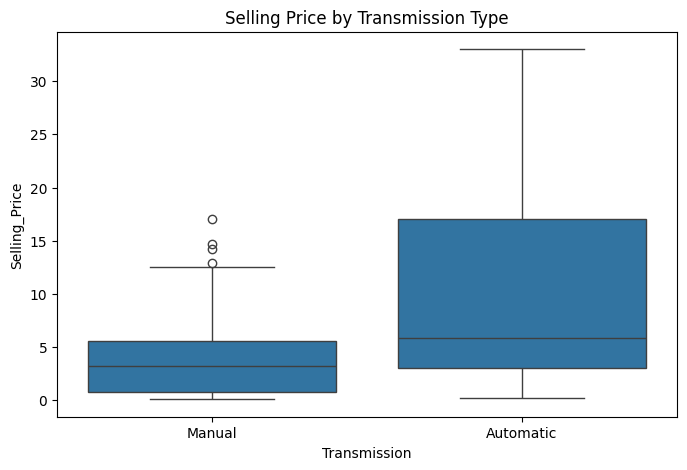

In [16]:
# 5-2. 범주형 변수: 변속기 유형별 평균 현재 판매가
plt.figure(figsize=(8, 5))
sns.boxplot(x="Transmission", y="Selling_Price", data=df)
plt.title("Selling Price by Transmission Type")
plt.show()

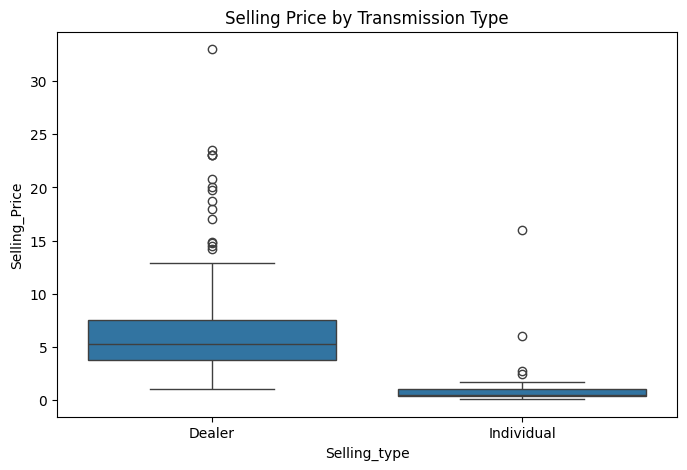

In [17]:
# 5-3. 범주형 변수: 판매 유형별 평균 현재 판매가
plt.figure(figsize=(8, 5))
sns.boxplot(x='Selling_type', y='Selling_Price', data=df)
plt.title("Selling Price by Transmission Type")
plt.show()

In [18]:
df['Car_Name'].unique()
# 데이터 수에 비해 차종이 너무 많기 때문에 차원이 너무 커져서 모델이 제대로 학습하기 힘들어지므로 적당히 그룹으로 나눌 필요가 있음.

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'Royal Enfield Thunder 500', 'UM Renegade Mojave',
       'KTM RC200', 'Bajaj Dominar 400', 'Royal Enfield Classic 350',
       'KTM RC390', 'Hyosung GT250R', 'Royal Enfield Thunder 350',
       'KTM 390 Duke ', 'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', '

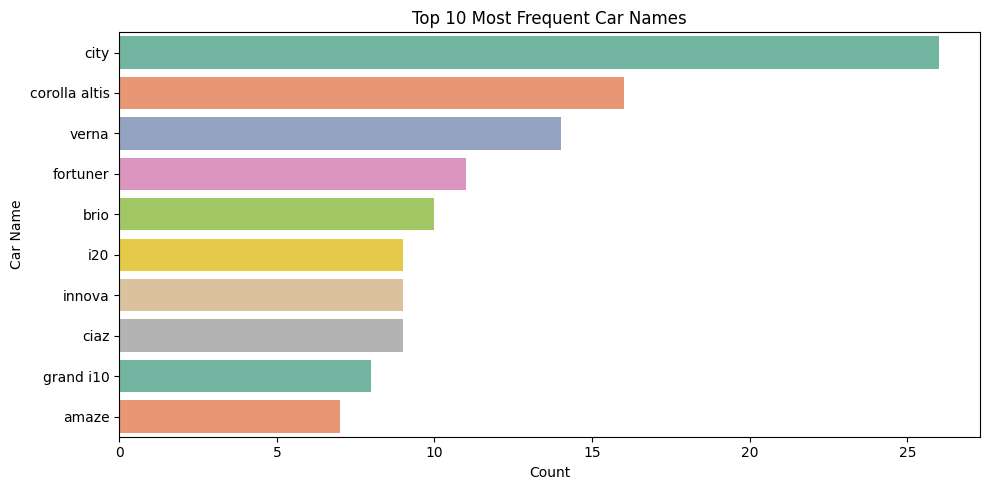

In [19]:
# 4-5. Car_Name 상위 10개를 기준으로 그룹화
plt.figure(figsize=(10, 5))
top_cars = df["Car_Name"].value_counts().nlargest(10)
sns.barplot(x=top_cars.values, y=top_cars.index, palette="Set2")
plt.title("Top 10 Most Frequent Car Names")
plt.xlabel("Count")
plt.ylabel("Car Name")
plt.tight_layout()
plt.show()

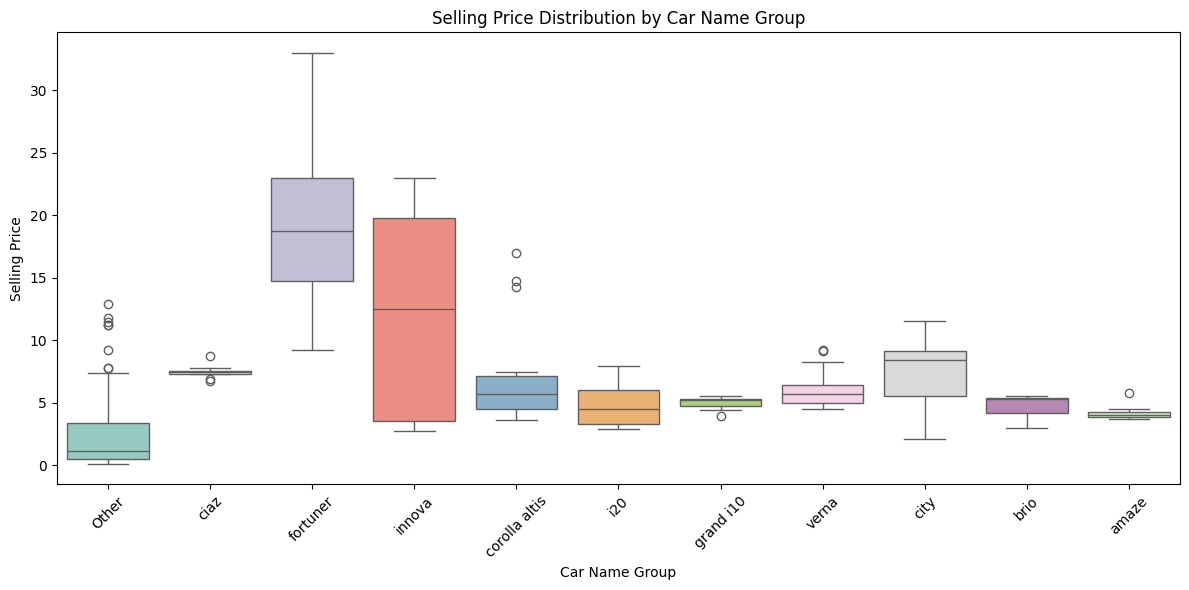

In [20]:
# 10개의 그룹에 대해 평균 현재 판매가를 조회

# 1. 상위 10개 차종 추출
top_10_cars = df['Car_Name'].value_counts().nlargest(10).index

# 2. 그룹 변수 생성 (상위10 + Other)
df['Car_Name_Grouped'] = df['Car_Name'].apply(lambda x: x if x in top_10_cars else 'Other')

# 3. 그룹별 판매가격 분포 박스플롯
plt.figure(figsize=(12,6))
sns.boxplot(x='Car_Name_Grouped', y='Selling_Price', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title('Selling Price Distribution by Car Name Group')
plt.xlabel('Car Name Group')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

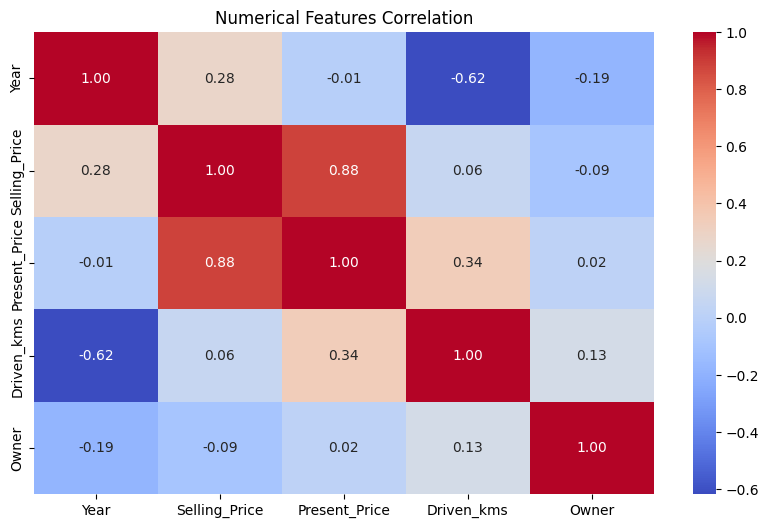

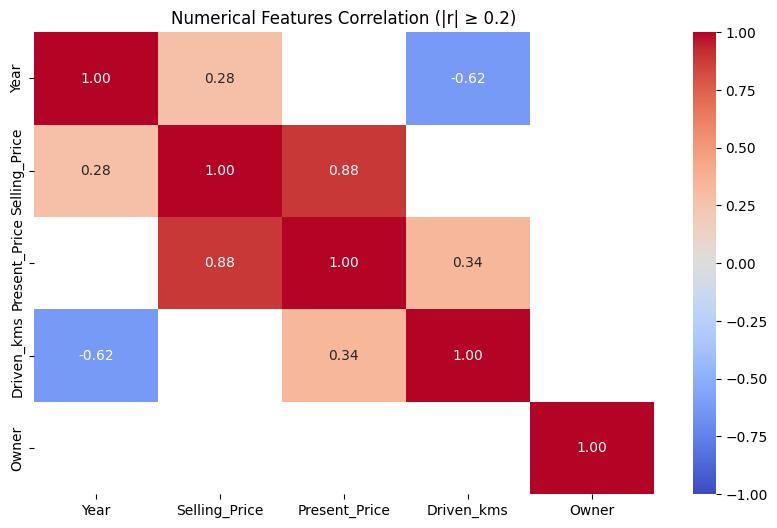

In [22]:
# 범주형 수치형 변수별 요약 - 차량 나이, 주행거리, 출시가 3개 추출
corr = df[numerical].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerical Features Correlation")
plt.show()

mask = abs(corr) < 0.2

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Numerical Features Correlation (|r| ≥ 0.2)")
plt.show()

In [200]:
# 5. 범주형 변수별 요약  - 차종 그룹, 연료타입, 판매 유형, 변속기 유형 4개
def summarize_categorical(df, col):
    count = df[col].value_counts()
    avg_price = df.groupby(col)["Selling_Price"].mean()
    return pd.concat([count.rename(f"{col}_Counts"), avg_price.rename(f"{col}_AvgPrice")], axis=1)

print("\n[연료 유형 요약]")
print(summarize_categorical(df, "Fuel_Type"))

print("\n[판매 유형 요약]")
print(summarize_categorical(df, "Selling_type"))

print("\n[변속기 유형 요약]")
print(summarize_categorical(df, "Transmission"))

print("\n[소유자 수 요약]")
print(summarize_categorical(df, "Owner"))

# 6. Car_Name과 Year 조합별 평균 가격 상위 10개
car_year_price = df.groupby(["Car_Name", "Year"])["Selling_Price"].mean().reset_index()
top_combinations = car_year_price.sort_values(by="Selling_Price", ascending=False).head(10)

print("\n[Car_Name과 Year 조합별 평균 판매가 상위 10]")
print(top_combinations)


[연료 유형 요약]
           Fuel_Type_Counts  Fuel_Type_AvgPrice
Fuel_Type                                      
Petrol                  238            3.277185
Diesel                   59            9.859492
CNG                       2            3.100000

[판매 유형 요약]
              Selling_type_Counts  Selling_type_AvgPrice
Selling_type                                            
Dealer                        194               6.575928
Individual                    105               0.877619

[변속기 유형 요약]
              Transmission_Counts  Transmission_AvgPrice
Transmission                                            
Manual                        260               3.812500
Automatic                      39               9.657179

[소유자 수 요약]
       Owner_Counts  Owner_AvgPrice
Owner                              
0               288          4.6725
1                10          1.9700
3                 1          2.5000

[Car_Name과 Year 조합별 평균 판매가 상위 10]
          Car_Name  Year  Selling_Price


In [201]:
# 파생변수 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_Name          299 non-null    object 
 1   Year              299 non-null    int64  
 2   Selling_Price     299 non-null    float64
 3   Present_Price     299 non-null    float64
 4   Driven_kms        299 non-null    int64  
 5   Fuel_Type         299 non-null    object 
 6   Selling_type      299 non-null    object 
 7   Transmission      299 non-null    object 
 8   Owner             299 non-null    int64  
 9   Car_Age           299 non-null    int64  
 10  Car_Name_Grouped  299 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 28.0+ KB


In [202]:
df = df.drop(['Car_Name', 'Year', 'Owner'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Selling_Price     299 non-null    float64
 1   Present_Price     299 non-null    float64
 2   Driven_kms        299 non-null    int64  
 3   Fuel_Type         299 non-null    object 
 4   Selling_type      299 non-null    object 
 5   Transmission      299 non-null    object 
 6   Car_Age           299 non-null    int64  
 7   Car_Name_Grouped  299 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 21.0+ KB


In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

# Label Encoding for categorical columns
for ccol in categorical_cols:
    le = LabelEncoder()
    df[ccol] = le.fit_transform(df[ccol].astype(str))
    label_encoders[ccol] = le  # 저장해두면 나중에 역변환할 수 있음

# Standard Scaling for numerical columns
for ncol in numerical_cols:
    sc = StandardScaler()
    df[[ncol]] = sc.fit_transform(df[[ncol]].astype(float))



In [204]:
# Separate features (X) and target (y)
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = [
    ('Linear Regression', LinearRegression(), {}),

    ('Ridge Regression', Ridge(), {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    }),

    ('Lasso Regression', Lasso(), {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    }),

    ('Decision Tree', DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),

    ('Random Forest', RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),

    ('Gradient Boosting', GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }),

    ('SVR', SVR(), {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),

    ('KNN', KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }),

    ('XGBoost', XGBRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }),
]

# Initialize a list to store model performance
results = []

# Loop through each model, train, and evaluate
for name, model, params in models:
    # Create a pipeline with preprocessor and model
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Evaluate the model
    train_pred = grid_search.predict(X_train)
    test_pred = grid_search.predict(X_test)
    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_results = grid_search.cv_results_

    # Store the results
    results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2,
        'train Score': train_score,
        'K fold CV' : cv_results
    })
    
    print(f"{name}:")
    print(f"  Best Parameters: {grid_search.best_params_}")
    print(f"  MSE: {mse}")
    print(f"  MAE: {mae}")
    print(f"  R2 Score: {r2}")
    print(f"  Train Score: {train_score}")
    import pandas as pd
    cv_df = pd.DataFrame(cv_results)
    display(cv_df[cv_df['params']== grid_search.best_params_])
    print()

# Convert results to a DataFrame and sort by R2 Score in descending order
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False)

# Print the sorted results
print("Model Performance (Sorted by R2 Score):")
print(results_df)

# Print the best model
best_model_result = results_df.iloc[0]
print("\nBest Model:")
print(f"  Model: {best_model_result['Model']}")
print(f"  Best Parameters: {best_model_result['Best Parameters']}")
print(f"  MSE: {best_model_result['MSE']}")
print(f"  MAE: {best_model_result['MAE']}")
print(f"  R2 Score: {best_model_result['R2 Score']}")
print(f"  RMSE: {np.sqrt(best_model_result['MSE'])}")

Linear Regression:
  Best Parameters: {}
  MSE: 0.18910534597130005
  MAE: 0.2817558898576949
  R2 Score: 0.865312493588904
  Train Score: 0.8871228882448573


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004837,0.000698,0.002949,0.00064,{},-0.147858,-0.068732,-0.122816,-0.128341,-0.088681,-0.111286,0.028577,1



Ridge Regression:
  Best Parameters: {'alpha': 0.1}
  MSE: 0.18888532361372762
  MAE: 0.28180688105152696
  R2 Score: 0.8654692012829353
  Train Score: 0.8871224537083382


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.003789,0.000399,0.002213,0.000391,0.1,{'alpha': 0.1},-0.147589,-0.068774,-0.122691,-0.128709,-0.088652,-0.111283,0.028534,1



Lasso Regression:
  Best Parameters: {'alpha': 0.01}
  MSE: 0.1863312942605987
  MAE: 0.2887615545406408
  R2 Score: 0.8672882711939778
  Train Score: 0.8849052533625077


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006949,0.001748,0.003613,0.001003,0.01,{'alpha': 0.01},-0.136122,-0.067523,-0.126172,-0.138528,-0.089659,-0.111601,0.028153,1



Decision Tree:
  Best Parameters: {'max_depth': 30, 'min_samples_split': 2}
  MSE: 0.05292934589331837
  MAE: 0.1329745860406283
  R2 Score: 0.9623018504435968
  Train Score: 1.0


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.005986,0.00062,0.003524,0.000574,30,2,"{'max_depth': 30, 'min_samples_split': 2}",-0.063154,-0.046627,-0.09885,-0.140889,-0.074859,-0.084876,0.032766,1



Random Forest:
  Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
  MSE: 0.029431245152068106
  MAE: 0.11709447944816433
  R2 Score: 0.9790380277207641
  Train Score: 0.9896092383884434


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.348455,0.025308,0.017899,0.001894,None,2,100,"{'max_depth': None, 'min_samples_split': 2, 'n...",-0.032236,-0.035477,-0.116867,-0.165559,-0.038425,-0.077713,0.054121,1



Gradient Boosting:
  Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
  MSE: 0.02049482355323421
  MAE: 0.08555362305198934
  R2 Score: 0.9854028628088629
  Train Score: 0.9989374664043144


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.07363,0.004944,0.001816,0.000412,0.2,3,100,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",-0.026877,-0.035273,-0.066028,-0.122186,-0.044679,-0.059009,0.034181,1



SVR:
  Best Parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
  MSE: 0.07133190208874751
  MAE: 0.14946029667195818
  R2 Score: 0.9491948999614641
  Train Score: 0.9890352548799961


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.00459,0.000483,0.003992,0.000624,10.0,scale,rbf,"{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}",-0.025923,-0.023072,-0.017756,-0.082416,-0.031146,-0.036063,0.023578,1



KNN:
  Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
  MSE: 0.09854763906127398
  MAE: 0.17052335731883314
  R2 Score: 0.9298108908572149
  Train Score: 1.0


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.003196,0.000746,0.003192,0.000755,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",-0.045113,-0.076477,-0.061453,-0.219338,-0.049055,-0.090287,0.065448,1



XGBoost:
  Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
  MSE: 0.03429311209706845
  MAE: 0.11572167147873928
  R2 Score: 0.9755752343662917
  Train Score: 0.999444272393769


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.058874,0.002809,0.003433,0.000502,0.2,3,200,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",-0.024643,-0.029408,-0.055889,-0.127801,-0.04435,-0.056418,0.037365,1



Model Performance (Sorted by R2 Score):
               Model                                    Best Parameters  \
5  Gradient Boosting  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
4      Random Forest  {'max_depth': None, 'min_samples_split': 2, 'n...   
8            XGBoost  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
3      Decision Tree          {'max_depth': 30, 'min_samples_split': 2}   
6                SVR     {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}   
7                KNN          {'n_neighbors': 3, 'weights': 'distance'}   
2   Lasso Regression                                    {'alpha': 0.01}   
1   Ridge Regression                                     {'alpha': 0.1}   
0  Linear Regression                                                 {}   

        MSE       MAE  R2 Score  train Score  \
5  0.020495  0.085554  0.985403     0.998937   
4  0.029431  0.117094  0.979038     0.989609   
8  0.034293  0.115722  0.975575     0.999444   
3  0.052929  0.1